In [51]:
# import libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Erosion:

## Importing the image:

In [15]:
img = cv2.imread(r"C:\Users\mpstme.student\Documents\I066\SIP\Exp_8\Fig0905(a)(wirebond-mask).tif", 0)

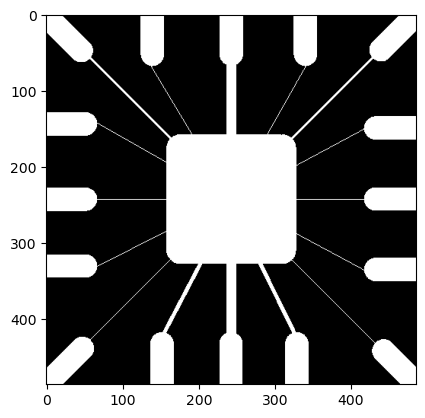

In [16]:
plt.imshow(img, cmap = "gray")

In [12]:
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [21]:
m, n = img.shape
print("The Size of the image is :", m, "x", n)

The Size of the image is : 486 x 486


In [23]:
struct_element_size = int(input("Enter Structuring Element Size : "))

Enter Structuring Element Size : 11


In [27]:
SE = np.ones((struct_element_size, struct_element_size))
constant = (struct_element_size - 1)//2

In [28]:
# Creating an image for Erosion Image
img_erode = np.zeros((m, n))

In [29]:
# Creating a user defined function for Erosion:
for i in range(constant, m - constant):
    for j in range(constant, n - constant):
        temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
        product = temp * SE
        img_erode[i, j] = np.min(product) # Selects the minimum from product.
        

Text(0.5, 1.0, 'Eroded with structuring Element of size 11 x 11')

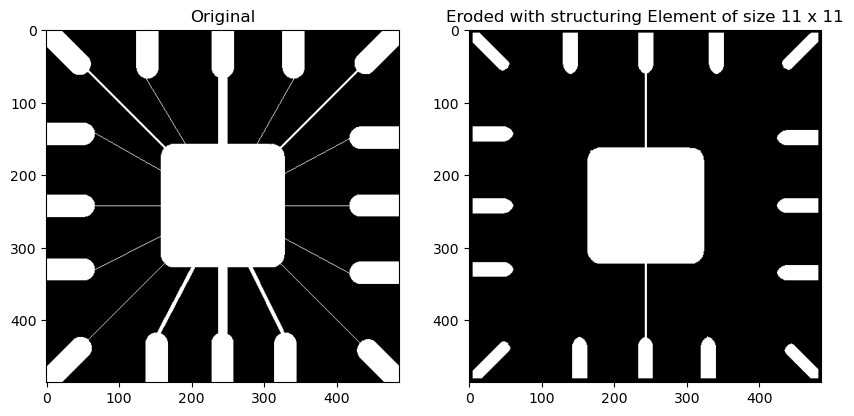

In [34]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = "gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(img_erode, cmap = "gray")
plt.title("Eroded with structuring Element of size {} x {}".format(struct_element_size, struct_element_size))


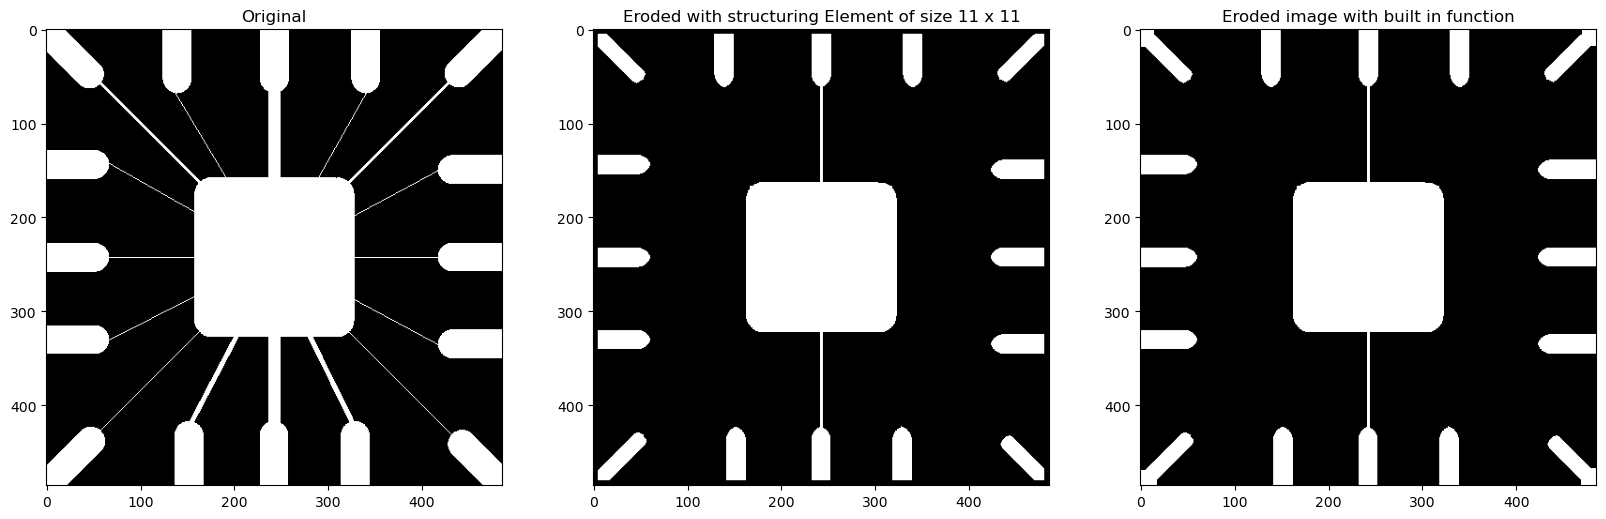

In [39]:
# Erosion using CV2 built in function:

# Defining the SE:
SE1 = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))

# Using the built in Erode operation:
img_erode_new = cv2.erode(img, SE1, 1)

# Plot 3 images together:
fig = plt.figure(figsize = (20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap = "gray")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.title("Eroded with structuring Element of size {} x {}".format(struct_element_size, struct_element_size))
plt.imshow(img_erode, cmap = "gray")
plt.subplot(1, 3, 3)
plt.title("Eroded image with built in function")
plt.imshow(img_erode_new, cmap = "gray")

## Conclusion:
### We can see that the image returned by our user defined function and the built in function of cv2 yield the same result

# Dilation:

## Reading another image:

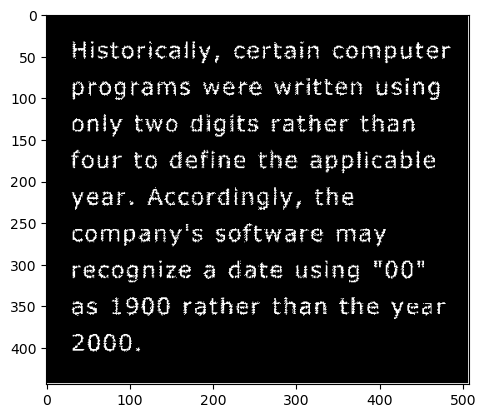

In [41]:
img_2 = cv2.imread(r"C:\Users\mpstme.student\Documents\I066\SIP\Exp_8\Fig0907(a)(text_gaps_1_and_2_pixels).tif", 0)
u, v = img_2.shape
plt.imshow(img_2, cmap="gray")


In [43]:
# Defining the structuring element:
SED = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
constant_2 = 1

In [45]:
# Define new image for dilation 
img_dilate= np.zeros((u, v))

In [49]:
# Creating a user defined function for Dilation:
for i in range(constant_2, u-constant_2):
  for j in range(constant_2, v-constant_2):
    temp = img_2[i-constant_2:i+constant_2+1, j-constant_2:j+constant_2+1]
    product = temp * SED
    img_dilate[i,j]= np.max(product)

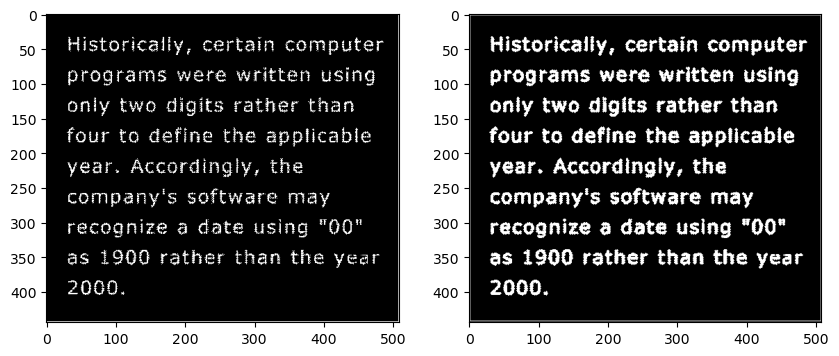

In [50]:
fig=plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_2, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_dilate, cmap= "gray")

## Conclusion:
###  We can see that the letters in the left image which have gaps in them had it sharpened/filled by applying the dilation matrix.